<a href="https://colab.research.google.com/github/pashkev14/ML_Labs/blob/main/Lab_2_2373_Savin_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('lab_dataset_processed.csv')

Для удобства скачали на компьютер обработанный датасет, чтобы каждый раз не обращаться к API Kaggle и предобрабатывать датасет.

In [2]:
import datetime as dt

def diff_between_sunrise_and_sunset(sunrise, sunset):

  def convert_into_seconds(value):
    values = value.split()
    time = dt.datetime.strptime(values[0], '%H:%M')
    if values[1] == 'PM':
      time += dt.timedelta(hours=12)
    return (time.hour * 3600) + (time.minute * 60)

  sunrise = convert_into_seconds(sunrise)
  sunset = convert_into_seconds(sunset)
  return sunset - sunrise

df['day_duration_s'] = df.apply(lambda x: diff_between_sunrise_and_sunset(x['sunrise'], x['sunset']), axis=1)

In [3]:
df['day_duration_s']

,day_duration_s
0,50400
1,52380
2,51000
3,52800
4,42180
...,...
27752,43140
27753,42660
27754,42900
27755,44280


Создали новый числовой атрибут day_duration_s, в котором хранится продолжительность светового дня в секундах.

Данные для атрибута были посчитаны из атрибутов sunrise и sunset.

В ходе исследования датасета в первой лабораторной работе было обнаружено, что у многих признаков количество выбросов настолько велико, что это скорее правило, нежели исключение, и избавляться от выбросов будет в дальнейшем чревато.

В силу особенностей выбранного датасета работа над очисткой дублей также не имеет смысла, поскольку совпадение двух строк по n-ому количеству признаков может показать не дубль, а данные об одном признаке в разных состояниях (например, погода в одном городе в разные промежутки дня).

In [17]:
df = df.drop(columns='Unnamed: 0', axis=1)
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,day_duration_s
0,0,98,34.52,69.18,104,1715849100,2024-05-16 13:15,26.6,79.8,18,...,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,7,55,50400
1,1,225,41.33,19.82,166,1715849100,2024-05-16 10:45,19.0,66.2,19,...,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,7,55,52380
2,2,11,36.76,3.05,2,1715849100,2024-05-16 09:45,23.0,73.4,26,...,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,7,55,51000
3,3,14,42.50,1.52,133,1715849100,2024-05-16 10:45,6.3,43.3,6,...,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,7,55,52800
4,4,122,-8.84,13.23,27,1715849100,2024-05-16 09:45,26.0,78.8,19,...,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,7,55,42180


При записи датасета в CSV-файл появилась первая колонка для индексации, ее нужно удалить.

Построение графиков зависимостей произошло в ходе первой лабораторной работы, когда мы строили диаграммы рассеяния и матрицу корреляции признаков, так что достаточно достроить столбик с новым признаком и приложить ранее полученный результат.

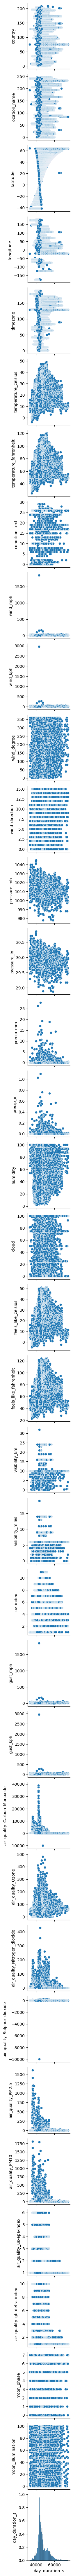

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

features = df.columns
non_numerical_features = [features[5], features[6], features[35], features[36], features[37], features[38]]
numerical_features = [x for x in features if x not in non_numerical_features]
sns.pairplot(df[numerical_features], x_vars=['day_duration_s'], y_vars=numerical_features)
plt.show()